<a href="https://colab.research.google.com/github/WeegorMartins/Analise-e-Previsao-de-Vendas-no-Ecommerce/blob/main/Segmenta%C3%A7%C3%A3o_de_Clientes_para_Estrat%C3%A9gias_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')

In [20]:
# Explorando as primeiras linhas do dataset
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000     

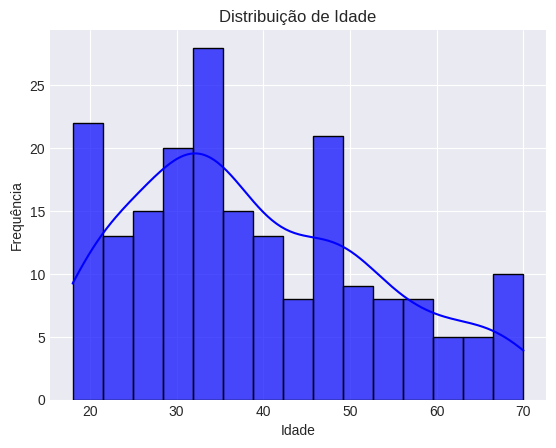

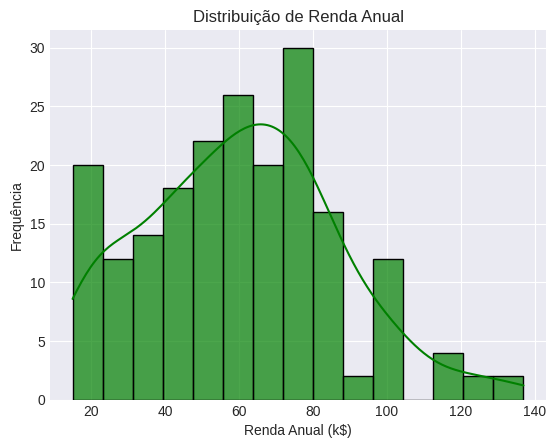

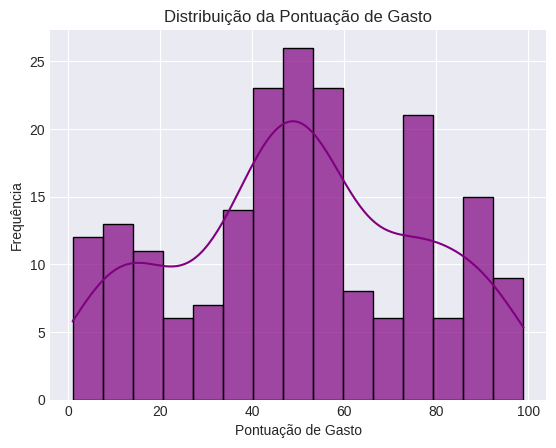

<ipython-input-21-3ddb9998561b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Genre', palette='cool')


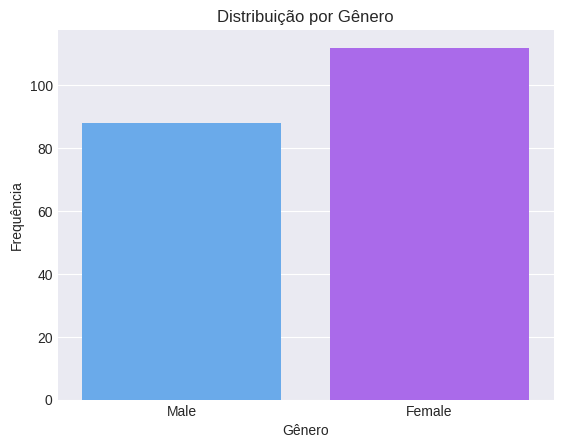

In [21]:
# Configurando os gráficos para a análise exploratória
plt.style.use('seaborn-v0_8-darkgrid')

# Distribuição de Idade
sns.histplot(data['Age'], bins=15, kde=True, color='blue', alpha=0.7)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Distribuição de Renda Anual
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='green', alpha=0.7)
plt.title('Distribuição de Renda Anual')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Frequência')
plt.show()

# Distribuição da Pontuação de Gasto
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='purple', alpha=0.7)
plt.title('Distribuição da Pontuação de Gasto')
plt.xlabel('Pontuação de Gasto')
plt.ylabel('Frequência')
plt.show()

# Distribuição por Gênero
sns.countplot(data=data, x='Genre', palette='cool')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

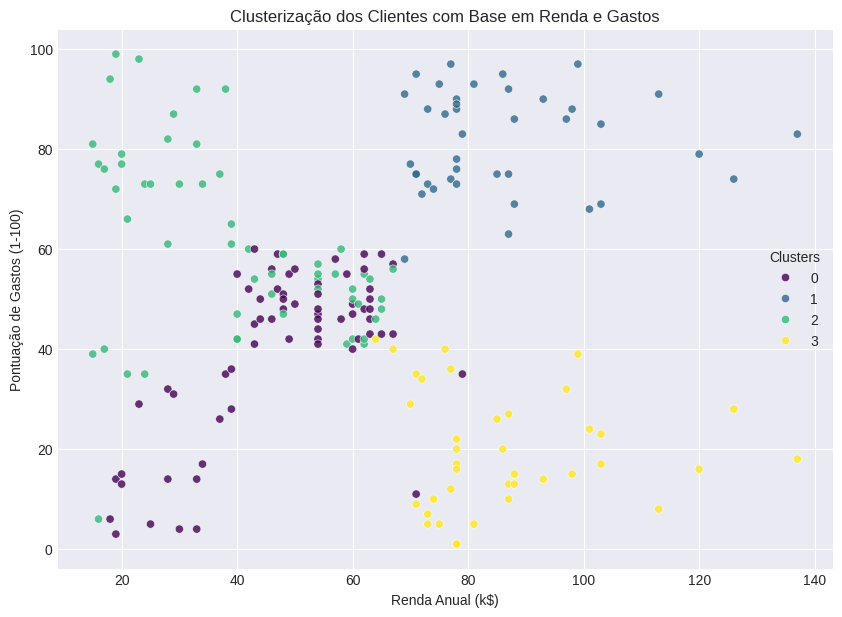

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionando as variáveis para clusterização
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Padronizando as variáveis
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicando K-Means para encontrar 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizando os clusters gerados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'],
    hue=data['Cluster'], palette='viridis', alpha=0.8
)
plt.title('Clusterização dos Clientes com Base em Renda e Gastos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend(title='Clusters')
plt.show()

# Resumo dos clusters
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

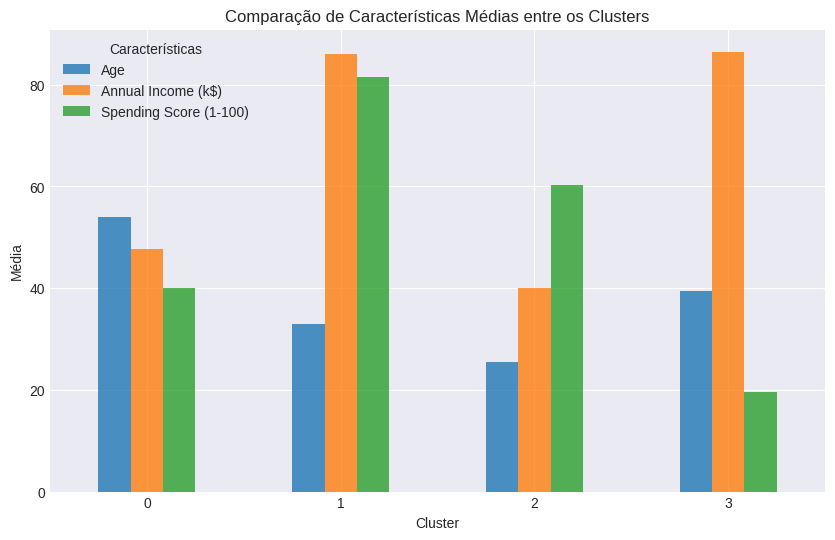

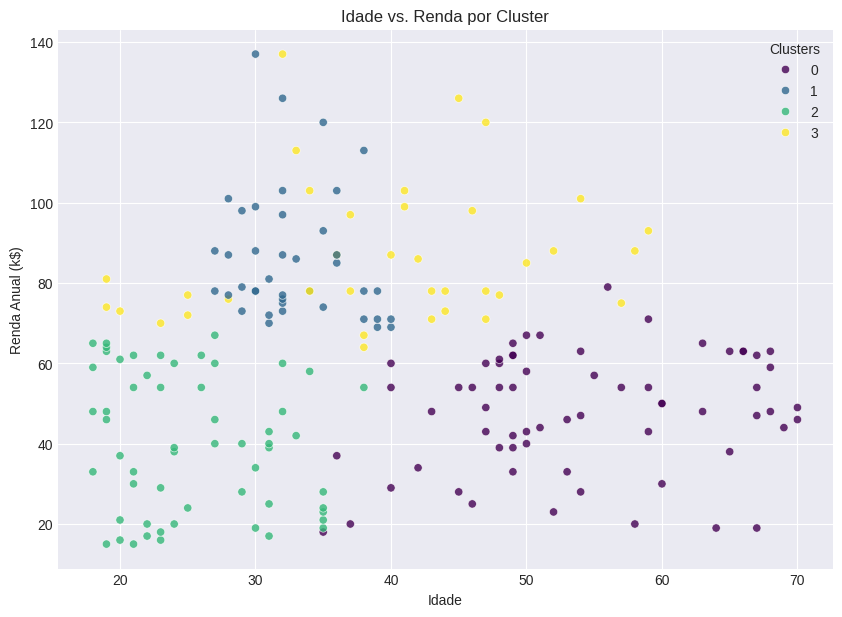

In [23]:
# Comparação de características médias entre os clusters
cluster_summary.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title('Comparação de Características Médias entre os Clusters')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Características')
plt.show()

# Gráfico de dispersão comparando renda e idade por cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Age'], y=data['Annual Income (k$)'],
    hue=data['Cluster'], palette='viridis', alpha=0.8
)
plt.title('Idade vs. Renda por Cluster')
plt.xlabel('Idade')
plt.ylabel('Renda Anual (k$)')
plt.legend(title='Clusters')
plt.show()

In [25]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.1 MB/s eta 0:00:00


In [28]:
# Salvando o documento no diretório
file_path = "Relatorio_Segmentacao_Clientes.docx"
doc.save(file_path)

file_path

'Relatorio_Segmentacao_Clientes.docx'